# 02-3D Position Estimation using WiFi Fingerprinting

## Name Surname: [Gökhan Ergül] Student ID: [211805060]

In [1]:
from datetime import datetime
print("Date:", datetime.today().strftime('%Y-%m-%d'))

Date: 2025-04-14


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import optuna.visualization as vis
import optuna

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_excel("02-3D Position Estimation using WiFi Fingerprinting.xlsx",index_col=False)
df.head()

,index,max_id (categoric),min_id (categoric),max_db,min_db,num_id,mean,std,max_ch (categoric),min_ch (categoric),num_ch,0_bssid (categoric),0_signal,1_bssid (categoric),1_signal,2_bssid (categoric),2_signal,3_bssid,3_signal,4_bssid,4_signal,5_bssid,5_signal,6_bssid,6_signal,7_bssid,7_signal,8_bssid,8_signal,9_bssid,9_signal,10_bssid,10_signal,11_bssid,11_signal,12_bssid,12_signal,13_bssid,13_signal,14_bssid,14_signal,15_bssid,15_signal,16_bssid,16_signal,17_bssid,17_signal,18_bssid,18_signal,19_bssid,19_signal,20_bssid,20_signal,21_bssid,21_signal,22_bssid,22_signal,23_bssid,23_signal,24_bssid,24_signal,25_bssid,25_signal,26_bssid,26_signal,27_bssid,27_signal,28_bssid,28_signal,29_bssid,29_signal,30_bssid,30_signal,31_bssid,31_signal,32_bssid,32_signal,33_bssid,33_signal,34_bssid,34_signal,35_bssid,35_signal,36_bssid,36_signal,37_bssid,37_signal,38_bssid,38_signal,39_bssid,39_signal,40_bssid,40_signal,41_bssid,41_signal,42_bssid,42_signal,43_bssid,43_signal,44_bssid,44_signal,45_bssid,45_signal,46_bssid,46_signal,47_bssid,47_signal,48_bssid,48_signal,49_bssid,49_signal,50_bssid,50_signal,51_bssid,51_signal,52_bssid,52_signal,53_bssid,53_signal,54_bssid,54_signal,55_bssid,55_signal,56_bssid,56_signal,57_bssid,57_signal,58_bssid,58_signal,59_bssid,59_signal,60_bssid,60_signal,61_bssid,61_signal,62_bssid,62_signal,63_bssid,63_signal,64_bssid,64_signal,65_bssid,65_signal,66_bssid,66_signal,67_bssid,67_signal,68_bssid,68_signal,69_bssid,69_signal,70_bssid,70_signal,71_bssid,71_signal,72_bssid,72_signal,73_bssid,73_signal,74_bssid,74_signal,75_bssid,75_signal,76_bssid,76_signal,77_bssid,77_signal,78_bssid,78_signal,79_bssid,79_signal,80_bssid,80_signal,81_bssid,81_signal,82_bssid,82_signal,83_bssid,83_signal,84_bssid,84_signal,85_bssid,85_signal,86_bssid,86_signal,87_bssid,87_signal,88_bssid,88_signal,89_bssid,89_signal,90_bssid,90_signal,91_bssid,91_signal,92_bssid,92_signal,93_bssid,93_signal,94_bssid,94_signal,95_bssid,95_signal,96_bssid,96_signal,97_bssid,97_signal,98_bssid,98_signal,99_bssid (categoric),99_signal,x,y,z,Floor
0,0,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
1,1,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
2,2,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
3,3,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0

# 1. Preprocessing

## Handle missing or zero values

In [111]:
df[df.isna().sum(axis=1) > 0]

,index,max_id (categoric),min_id (categoric),max_db,min_db,num_id,mean,std,max_ch (categoric),min_ch (categoric),num_ch,0_bssid (categoric),0_signal,1_bssid (categoric),1_signal,2_bssid (categoric),2_signal,3_bssid,3_signal,4_bssid,4_signal,5_bssid,5_signal,6_bssid,6_signal,7_bssid,7_signal,8_bssid,8_signal,9_bssid,9_signal,10_bssid,10_signal,11_bssid,11_signal,12_bssid,12_signal,13_bssid,13_signal,14_bssid,14_signal,15_bssid,15_signal,16_bssid,16_signal,17_bssid,17_signal,18_bssid,18_signal,19_bssid,19_signal,20_bssid,20_signal,21_bssid,21_signal,22_bssid,22_signal,23_bssid,23_signal,24_bssid,24_signal,25_bssid,25_signal,26_bssid,26_signal,27_bssid,27_signal,28_bssid,28_signal,29_bssid,29_signal,30_bssid,30_signal,31_bssid,31_signal,32_bssid,32_signal,33_bssid,33_signal,34_bssid,34_signal,35_bssid,35_signal,36_bssid,36_signal,37_bssid,37_signal,38_bssid,38_signal,39_bssid,39_signal,40_bssid,40_signal,41_bssid,41_signal,42_bssid,42_signal,43_bssid,43_signal,44_bssid,44_signal,45_bssid,45_signal,46_bssid,46_signal,47_bssid,47_signal,48_bssid,48_signal,49_bssid,49_signal,50_bssid,50_signal,51_bssid,51_signal,52_bssid,52_signal,53_bssid,53_signal,54_bssid,54_signal,55_bssid,55_signal,56_bssid,56_signal,57_bssid,57_signal,58_bssid,58_signal,59_bssid,59_signal,60_bssid,60_signal,61_bssid,61_signal,62_bssid,62_signal,63_bssid,63_signal,64_bssid,64_signal,65_bssid,65_signal,66_bssid,66_signal,67_bssid,67_signal,68_bssid,68_signal,69_bssid,69_signal,70_bssid,70_signal,71_bssid,71_signal,72_bssid,72_signal,73_bssid,73_signal,74_bssid,74_signal,75_bssid,75_signal,76_bssid,76_signal,77_bssid,77_signal,78_bssid,78_signal,79_bssid,79_signal,80_bssid,80_signal,81_bssid,81_signal,82_bssid,82_signal,83_bssid,83_signal,84_bssid,84_signal,85_bssid,85_signal,86_bssid,86_signal,87_bssid,87_signal,88_bssid,88_signal,89_bssid,89_signal,90_bssid,90_signal,91_bssid,91_signal,92_bssid,92_signal,93_bssid,93_signal,94_bssid,94_signal,95_bssid,95_signal,96_bssid,96_signal,97_bssid,97_signal,98_bssid,98_signal,99_bssid (categoric),99_signal,x,y,z,Floor


In [112]:
(df.isna().sum()>0).unique() #i just wanted to check.

array([False])

##  Signal values of 0 may indicate missing data (no signal received).
• RSSI values are usually negative; higher values (e.g., -40 dBm) indicate stronger signals.


In [7]:
rssi = list()
for i in df.columns:
    if 'signal' in i:
        rssi.append(i)

rssi[:5]

['0_signal', '1_signal', '2_signal', '3_signal', '4_signal']

In [8]:
[col for col in rssi if (df[col]==0).all()] #is there any column contain only zero

[]

In [9]:
len([col for col in rssi if (df[col]==0).any()]) #every col contains at least one  0 value

100

In [10]:
zero_percentages = df[rssi].apply(lambda col: (col == 0).mean() * 100).sort_values(ascending=False)

In [11]:
(100 - 99.092742)/100 * len(df) #only 18 rows have nonzero values for this column, so I can delete that and %99 more

17.999998719999976

In [12]:
deleted_cols = zero_percentages[zero_percentages>99.48] # I am going to delete these columns

In [13]:
deleted_cols

11_signal    99.747984
10_signal    99.747984
5_signal     99.747984
4_signal     99.747984
33_signal    99.747984
14_signal    99.747984
22_signal    99.747984
20_signal    99.747984
19_signal    99.747984
86_signal    99.747984
92_signal    99.747984
25_signal    99.697581
18_signal    99.697581
63_signal    99.697581
17_signal    99.647177
8_signal     99.647177
93_signal    99.596774
27_signal    99.596774
1_signal     99.596774
2_signal     99.495968
90_signal    99.495968
61_signal    99.495968
54_signal    99.495968
83_signal    99.495968
30_signal    99.495968
82_signal    99.495968
95_signal    99.495968
98_signal    99.495968
9_signal     99.495968
6_signal     99.495968
dtype: float64

In [14]:
df.drop(columns=deleted_cols.index, inplace=True)

In [15]:
df.columns

Index(['index', 'max_id (categoric)', 'min_id (categoric)', 'max_db', 'min_db',
       'num_id', 'mean', 'std', 'max_ch (categoric)', 'min_ch (categoric)',
       ...
       '96_signal', '97_bssid', '97_signal', '98_bssid',
       '99_bssid (categoric)', '99_signal', 'x', 'y', 'z', 'Floor'],
      dtype='object', length=185)

In [16]:
deleted_col_numbers = [col.split('_')[0] for col in deleted_cols.index]
deleted_bssid_cols = list()
for i in deleted_col_numbers:
    if f"{i}_bssid" in df.columns:
        deleted_bssid_cols.append(f"{i}_bssid")

In [17]:
df.drop(columns=deleted_bssid_cols, inplace=True)

In [18]:
df.drop(columns='index', inplace=True)

In [19]:
df.head()

,max_id (categoric),min_id (categoric),max_db,min_db,num_id,mean,std,max_ch (categoric),min_ch (categoric),num_ch,0_bssid (categoric),0_signal,1_bssid (categoric),2_bssid (categoric),3_bssid,3_signal,7_bssid,7_signal,12_bssid,12_signal,13_bssid,13_signal,15_bssid,15_signal,16_bssid,16_signal,21_bssid,21_signal,23_bssid,23_signal,24_bssid,24_signal,26_bssid,26_signal,28_bssid,28_signal,29_bssid,29_signal,31_bssid,31_signal,32_bssid,32_signal,34_bssid,34_signal,35_bssid,35_signal,36_bssid,36_signal,37_bssid,37_signal,38_bssid,38_signal,39_bssid,39_signal,40_bssid,40_signal,41_bssid,41_signal,42_bssid,42_signal,43_bssid,43_signal,44_bssid,44_signal,45_bssid,45_signal,46_bssid,46_signal,47_bssid,47_signal,48_bssid,48_signal,49_bssid,49_signal,50_bssid,50_signal,51_bssid,51_signal,52_bssid,52_signal,53_bssid,53_signal,55_bssid,55_signal,56_bssid,56_signal,57_bssid,57_signal,58_bssid,58_signal,59_bssid,59_signal,60_bssid,60_signal,62_bssid,62_signal,64_bssid,64_signal,65_bssid,65_signal,66_bssid,66_signal,67_bssid,67_signal,68_bssid,68_signal,69_bssid,69_signal,70_bssid,70_signal,71_bssid,71_signal,72_bssid,72_signal,73_bssid,73_signal,74_bssid,74_signal,75_bssid,75_signal,76_bssid,76_signal,77_bssid,77_signal,78_bssid,78_signal,79_bssid,79_signal,80_bssid,80_signal,81_bssid,81_signal,84_bssid,84_signal,85_bssid,85_signal,87_bssid,87_signal,88_bssid,88_signal,89_bssid,89_signal,91_bssid,91_signal,94_bssid,94_signal,96_bssid,96_signal,97_bssid,97_signal,99_bssid (categoric),99_signal,x,y,z,Floor
0,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
1,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
2,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
3,13,28,-82,-40,19,-69.157895,11.703635,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,1,-70,1,-70,1,-80,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-72,1,-68,1,-40,1,-40,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-60,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base
4,12,28,-82,-40,20,-71.100000,8.932525,6,1,3,1,-80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-62,0,0,1,-70,1,-70,1,-72,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-70,1,-70,1,-40,1,-68,1,-80,1,-78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-74,1,-72,0,0,0,0,0,0,0,0,0,0,0,0,1,-64,1,-68,1,-74,1,-74,1,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Base


In [20]:
rssi = list()
for i in df.columns:
    if 'signal' in i:
        rssi.append(i)

len(rssi)

70

In [21]:
for col in rssi:
    df.loc[df[col] == 0, col] = -100

## StandardScaler

In [22]:
df_standard = df[rssi]

In [23]:
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_standard), 
                           columns=df_standard.columns, 
                           index=df_standard.index)

In [24]:
df_standard = pd.concat([df_standard, df[['x', 'y', 'z']]], axis=1)

In [25]:
df_standard.head()

,0_signal,3_signal,7_signal,12_signal,13_signal,15_signal,16_signal,21_signal,23_signal,24_signal,26_signal,28_signal,29_signal,31_signal,32_signal,34_signal,35_signal,36_signal,37_signal,38_signal,39_signal,40_signal,41_signal,42_signal,43_signal,44_signal,45_signal,46_signal,47_signal,48_signal,49_signal,50_signal,51_signal,52_signal,53_signal,55_signal,56_signal,57_signal,58_signal,59_signal,60_signal,62_signal,64_signal,65_signal,66_signal,67_signal,68_signal,69_signal,70_signal,71_signal,72_signal,73_signal,74_signal,75_signal,76_signal,77_signal,78_signal,79_signal,80_signal,81_signal,84_signal,85_signal,87_signal,88_signal,89_signal,91_signal,94_signal,96_signal,97_signal,99_signal,x,y,z
0,-0.258240,-0.080648,-0.086922,-0.132448,-0.08694,-0.100282,-0.111049,-0.087106,-0.24144,-1.284119,-0.106829,-0.269056,-0.504994,1.413246,-0.087616,2.035276,2.022682,0.305188,0.855348,-0.6474,-0.683934,-0.679617,-0.670009,-0.750943,-0.77294,1.806230,2.142066,3.12822,3.139239,0.30939,0.455716,-0.534958,-0.530591,-0.935901,-0.947969,-0.094056,-0.297366,-0.298093,4.095523,-0.248243,-0.086918,-0.169643,-0.149415,-0.103687,-0.121371,-0.099072,0.590615,0.690163,-0.353448,-0.351373,-0.753422,-0.747987,-0.673183,-0.720794,1.395924,1.673637,0.554139,0.515649,0.701724,-0.620944,-0.164476,-0.157011,-0.427548,-0.08955,-0.10977,-0.195376,-0.298183,-0.681728,-0.845336,-0.303538,0.0,0.0,0.0
1,-0.258240,-0.080648,-0.086922,-0.132448,-0.08694,-0.100282,-0.111049,-0.087106,-0.24144,-1.284119,-0.106829,-0.269056,-0.504994,1.413246,-0.087616,2.035276,2.022682,0.305188,0.855348,-0.6474,-0.683934,-0.679617,-0.670009,-0.750943,-0.77294,1.806230,2.142066,3.12822,3.139239,0.30939,0.455716,-0.534958,-0.530591,-0.935901,-0.947969,-0.094056,-0.297366,-0.298093,4.095523,-0.248243,-0.086918,-0.169643,-0.149415,-0.103687,-0.121371,-0.099072,0.590615,0.690163,-0.353448,-0.351373,-0.753422,-0.747987,-0.673183,-0.720794,1.395924,1.673637,0.554139,0.515649,0.701724,-0.620944,-0.164476,-0.157011,-0.427548,-0.08955,-0.10977,-0.195376,-0.298183,-0.681728,-0.845336,-0.303538,0.0,0.0,0.0
2,-0.258240,-0.080648,-0.086922,-0.132448,-0.08694,-0.100282,-0.111049,-0.087106,-0.24144,-1.284119,-0.106829,-0.269056,-0.504994,1.413246,-0.087616,2.035276,2.022682,0.305188,0.855348,-0.6474,-0.683934,-0.679617,-0.670009,-0.750943,-0.77294,1.806230,2.142066,3.12822,3.139239,0.30939,0.455716,-0.534958,-0.530591,-0.935901,-0.947969,-0.094056,-0.297366,-0.298093,4.095523,-0.248243,-0.086918,-0.169643,-0.149415,-0.103687,-0.121371,-0.099072,0.590615,0.690163,-0.353448,-0.351373,-0.753422,-0.747987,-0.673183,-0.720794,1.395924,1.673637,0.554139,0.515649,0.701724,-0.620944,-0.164476,-0.157011,-0.427548,-0.08955,-0.10977,-0.195376,-0.298183,-0.681728,-0.845336,-0.303538,0.0,0.0,0.0
3,-0.258240,-0.080648,-0.086922,-0.132448,-0.08694,-0.100282,-0.111049,-0.087106,-0.24144,-1.284119,-0.106829,-0.269056,-0.504994,1.413246,-0.087616,2.035276,2.022682,0.305188,0.855348,-0.6474,-0.683934,-0.679617,-0.670009,-0.750943,-0.77294,1.806230,2.142066,3.12822,3.139239,0.30939,0.455716,-0.534958,-0.530591,-0.935901,-0.947969,-0.094056,-0.297366,-0.298093,4.095523,-0.248243,-0.086918,-0.169643,-0.149415,-0.103687,-0.121371,-0.099072,0.590615,0.690163,-0.353448,-0.351373,-0.753422,-0.747987,-0.673183,-0.720794,1.395924,1.673637,0.554139,0.515649,0.701724,-0.620944,-0.164476,-0.157011,-0.427548,-0.08955,-0.10977,-0.195376,-0.298183,-0.681728,-0.845336,-0.303538,0.0,0.0,0.0
4,4.328584,-0.080648,-0.086922,-0.132448,-0.08694,-0.100282,-0.111049,-0.087106,-0.24144,-1.284119,-0.106829,-0.269056,-0.504994,1.413246,-0.087616,2.035276,2.022682,0.826155,0.855348,-0.6474,-0.683934,-0.679617,-0.670009,-0.750943,-0.77294,2.002848,1.948318,3.12822,1.351786,0.30939,0.455716,-0.534958,-0.530591,-0.935901,-0.947969,-0.094056,-0.297366,-0.298093,4.095523,-0.248243,-0.086918,-0.169643,-0.149415,-0.103687,-0.121371,-0.099072,0.590615,0.690163,-0.353448,-0.351373,-0.753422,-0.747987,-0.673183,-0.720794,1.395924,1.118881,0.554139,0.515

# identify the most meaningful APs

In [26]:
X = df_standard.drop(columns=['x','y','z'])  
y = df[['x','y','z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

### SelectKBest 
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train['x']) #The f_classif function uses ANOVA F-test and does not support multiple outputs.
selected_features_kbest = X.columns[selector.get_support()]

print("Best features selected by SelectKBest:")
print(selected_features_kbest)

### RandomForest.feature_importances_
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
print("\nBest features selected by RandomForest:")
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")

### Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]

print("\nBest features selected by RFE:")
print(selected_features_rfe)


Best features selected by SelectKBest:
Index(['38_signal', '39_signal', '40_signal', '41_signal', '43_signal',
       '50_signal', '51_signal', '74_signal', '75_signal', '97_signal'],
      dtype='object')

Best features selected by RandomForest:
68_signal: 0.2182
78_signal: 0.1841
69_signal: 0.1517
36_signal: 0.0816
97_signal: 0.0560
29_signal: 0.0439
31_signal: 0.0337
38_signal: 0.0233
50_signal: 0.0208
41_signal: 0.0152

Best features selected by RFE:
Index(['29_signal', '31_signal', '36_signal', '38_signal', '50_signal',
       '68_signal', '69_signal', '78_signal', '80_signal', '97_signal'],
      dtype='object')


# 2. Model Training without choosing any ranking or selecting important features

## RandomForestRegressor

In [27]:
model_rf = RandomForestRegressor(random_state = 42)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

## LinearRegression

In [28]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

##  XGBoost

In [29]:
model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

# 3. Feature Selection / Ranking

## RandomForestRegressor

In [30]:
importances = model_rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf)

      Feature  Importance
46  68_signal    0.218189
56  78_signal    0.184060
47  69_signal    0.151736
17  36_signal    0.081638
68  97_signal    0.056028
..        ...         ...
40  60_signal    0.000008
63  88_signal    0.000007
35  55_signal    0.000006
2    7_signal    0.000006
14  32_signal    0.000004

[70 rows x 2 columns]


In [31]:
signal_features = feature_importance_rf[feature_importance_rf['Feature'].str.contains('signal')] #it was easier than using rssi list
signal_features.sort_values(by='Importance', ascending=False)

,Feature,Importance
46,68_signal,0.218189
56,78_signal,0.184060
47,69_signal,0.151736
17,36_signal,0.081638
68,97_signal,0.056028
...,...,...
40,60_signal,0.000008
63,88_signal,0.000007
35,55_signal,0.000006
2,7_signal,0.000006


## XGBoost feature_importance

In [32]:
feature_importance_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': model_xgb.feature_importances_})
feature_importance_xgb = feature_importance_xgb[feature_importance_xgb['Feature'].str.contains('signal')]
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)
feature_importance_xgb_copy = feature_importance_xgb.copy()

# Final model

In [37]:
selected_features_kbest.tolist()

['38_signal',
 '39_signal',
 '40_signal',
 '41_signal',
 '43_signal',
 '50_signal',
 '51_signal',
 '74_signal',
 '75_signal',
 '97_signal']

In [38]:
feature_importance_xgb['Feature'][:20].tolist()

['41_signal',
 '35_signal',
 '81_signal',
 '39_signal',
 '80_signal',
 '74_signal',
 '34_signal',
 '69_signal',
 '72_signal',
 '53_signal',
 '96_signal',
 '78_signal',
 '52_signal',
 '73_signal',
 '64_signal',
 '31_signal',
 '71_signal',
 '68_signal',
 '97_signal',
 '91_signal']

In [39]:
selected_features_rfe.tolist()

['29_signal',
 '31_signal',
 '36_signal',
 '38_signal',
 '50_signal',
 '68_signal',
 '69_signal',
 '78_signal',
 '80_signal',
 '97_signal']

In [40]:
signal_features['Feature'][:20].tolist()

['68_signal',
 '78_signal',
 '69_signal',
 '36_signal',
 '97_signal',
 '29_signal',
 '31_signal',
 '38_signal',
 '50_signal',
 '41_signal',
 '79_signal',
 '80_signal',
 '52_signal',
 '42_signal',
 '46_signal',
 '37_signal',
 '81_signal',
 '39_signal',
 '73_signal',
 '96_signal']

In [41]:
signal_names = [signal for signal, _ in feature_importance[:20]]
signal_names

['68_signal',
 '78_signal',
 '69_signal',
 '36_signal',
 '97_signal',
 '29_signal',
 '31_signal',
 '38_signal',
 '50_signal',
 '41_signal',
 '79_signal',
 '80_signal',
 '52_signal',
 '42_signal',
 '46_signal',
 '37_signal',
 '81_signal',
 '39_signal',
 '73_signal',
 '96_signal']

In [42]:
signal_features = signal_features['Feature'][:20].tolist()
selected_features_rfe = selected_features_rfe.tolist()
feature_importance_xgb = feature_importance_xgb['Feature'][:20].tolist()
selected_features_kbest = selected_features_kbest.tolist()

In [43]:
combined_features = signal_features.copy()
for lst in [selected_features_rfe, feature_importance_xgb, selected_features_kbest, signal_names]:
    combined_features += [item for item in lst if item not in combined_features]


print(f'lenght of selected features of signals: {len(combined_features)}')
print(f'Selected columns:{combined_features}')

lenght of selected features of signals: 32
Selected columns:['68_signal', '78_signal', '69_signal', '36_signal', '97_signal', '29_signal', '31_signal', '38_signal', '50_signal', '41_signal', '79_signal', '80_signal', '52_signal', '42_signal', '46_signal', '37_signal', '81_signal', '39_signal', '73_signal', '96_signal', '35_signal', '74_signal', '34_signal', '72_signal', '53_signal', '64_signal', '71_signal', '91_signal', '40_signal', '43_signal', '51_signal', '75_signal']


# Final model traning 

In [44]:
df_final = df_standard[combined_features[:16]]
df_final = pd.concat([df_final, df_standard[['x', 'y', 'z']]], axis=1)
df_final.head()

,68_signal,78_signal,69_signal,36_signal,97_signal,29_signal,31_signal,38_signal,50_signal,41_signal,79_signal,80_signal,52_signal,42_signal,46_signal,37_signal,x,y,z
0,0.590615,0.554139,0.690163,0.305188,-0.845336,-0.504994,1.413246,-0.6474,-0.534958,-0.670009,0.515649,0.701724,-0.935901,-0.750943,3.12822,0.855348,0.0,0.0,0.0
1,0.590615,0.554139,0.690163,0.305188,-0.845336,-0.504994,1.413246,-0.6474,-0.534958,-0.670009,0.515649,0.701724,-0.935901,-0.750943,3.12822,0.855348,0.0,0.0,0.0
2,0.590615,0.554139,0.690163,0.305188,-0.845336,-0.504994,1.413246,-0.6474,-0.534958,-0.670009,0.515649,0.701724,-0.935901,-0.750943,3.12822,0.855348,0.0,0.0,0.0
3,0.590615,0.554139,0.690163,0.305188,-0.845336,-0.504994,1.413246,-0.6474,-0.534958,-0.670009,0.515649,0.701724,-0.935901,-0.750943,3.12822,0.855348,0.0,0.0,0.0
4,0.590615,0.554139,0.690163,0.826155,-0.845336,-0.504994,1.413246,-0.6474,-0.534958,-0.670009,0.515649,0.701724,-0.935901,-0.750943,3.12822,0.855348,0.0,0.0,0.0


In [45]:
X = df_final.drop(columns=['x','y','z'])  
y = df_final[['x','y','z']]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.3, random_state=13)

## RandomForestRegressor

In [46]:
model_rf_final = RandomForestRegressor(random_state = 42)
model_rf_final.fit(X_train_final,y_train_final)
y_pred_rf_final = model_rf_final.predict(X_test_final)

## LinearRegression

In [47]:
model_lr_final = LinearRegression()
model_lr_final.fit(X_train_final, y_train_final)
y_pred_lr_final = model_lr_final.predict(X_test_final)

## XGBoost

In [48]:
model_xgb_final = XGBRegressor(objective="reg:squarederror", n_estimators=200, random_state=42)
model_xgb_final.fit(X_train_final, y_train_final)
y_pred_xgb_final = model_xgb_final.predict(X_test_final)

# 4. Performance Reporting

## Euclidean Error

### Train

In [58]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_train_xgb = model_xgb.predict(X_train)

euclidean_error_train_lr = np.mean(np.linalg.norm(y_pred_train_lr - y_train, axis=1))
euclidean_error_train_xgb = np.mean(np.linalg.norm(y_pred_train_xgb - y_train, axis=1))
euclidean_error_train_rf = np.mean(np.linalg.norm(y_pred_train_rf - y_train, axis=1))
print(f'Without choosing important columns:')
print(f"Train RandomForestRegressor - Mean Euclidean Error: {euclidean_error_train_rf:.4f}")
print(f"Train Linear Regression - Mean Euclidean Error: {euclidean_error_train_lr:.4f}")
print(f"Train XGBoost - Mean Euclidean Error: {euclidean_error_train_xgb:.4f}")

y_pred_train_rf_final = model_rf_final.predict(X_train_final)
y_pred_train_lr_final = model_lr_final.predict(X_train_final)
y_pred_train_xgb_final = model_xgb_final.predict(X_train_final)

euclidean_error_train_lr_final = np.mean(np.linalg.norm(y_pred_train_lr_final - y_train_final, axis=1))
euclidean_error_train_xgb_final = np.mean(np.linalg.norm(y_pred_train_xgb_final - y_train_final, axis=1))
euclidean_error_train_rf_final = np.mean(np.linalg.norm(y_pred_train_rf_final - y_train_final, axis=1))
print(f'With important columns:')
print(f"Train RandomForestRegressor - Mean Euclidean Error: {euclidean_error_train_rf_final:.4f}")
print(f"Train Linear Regression - Mean Euclidean Error: {euclidean_error_train_lr_final:.4f}")
print(f"Train XGBoost - Mean Euclidean Error: {euclidean_error_train_xgb_final:.4f}")

Without choosing important columns:
Train RandomForestRegressor - Mean Euclidean Error: 0.1777
Train Linear Regression - Mean Euclidean Error: 3.1897
Train XGBoost - Mean Euclidean Error: 0.0650
With important columns:
Train RandomForestRegressor - Mean Euclidean Error: 0.1986
Train Linear Regression - Mean Euclidean Error: 4.4114
Train XGBoost - Mean Euclidean Error: 0.0129


### Test

In [59]:
euclidean_error_lr = np.mean(np.linalg.norm(y_pred_lr - y_test, axis=1))
euclidean_error_xgb = np.mean(np.linalg.norm(y_pred_xgb - y_test, axis=1))
euclidean_error_rf = np.mean(np.linalg.norm(y_pred_rf - y_test, axis=1))
print('Without choosing important columns')
print(f"Test RandomForestRegressor - Mean Euclidean Error: {euclidean_error_rf:.4f}")
print(f"Test Linear Regression - Mean Euclidean Error: {euclidean_error_lr:.4f}")
print(f"Test XGBoost - Mean Euclidean Error: {euclidean_error_xgb:.4f}")

euclidean_error_lr_final = np.mean(np.linalg.norm(y_pred_lr_final - y_test_final, axis=1))
euclidean_error_xgb_final = np.mean(np.linalg.norm(y_pred_xgb_final - y_test_final, axis=1))
euclidean_error_rf_final = np.mean(np.linalg.norm(y_pred_rf_final - y_test_final, axis=1))
print(f'With important columns:')
print(f"Test RandomForestRegressor - Mean Euclidean Error: {euclidean_error_rf_final:.4f}")
print(f"Test Linear Regression - Mean Euclidean Error: {euclidean_error_lr_final:.4f}")
print(f"Test XGBoost - Mean Euclidean Error: {euclidean_error_xgb_final:.4f}")

Without choosing important columns
Test RandomForestRegressor - Mean Euclidean Error: 0.4577
Test Linear Regression - Mean Euclidean Error: 3.3486
Test XGBoost - Mean Euclidean Error: 0.2771
With important columns:
Test RandomForestRegressor - Mean Euclidean Error: 0.5981
Test Linear Regression - Mean Euclidean Error: 4.6368
Test XGBoost - Mean Euclidean Error: 0.2128


# 5. Visualization

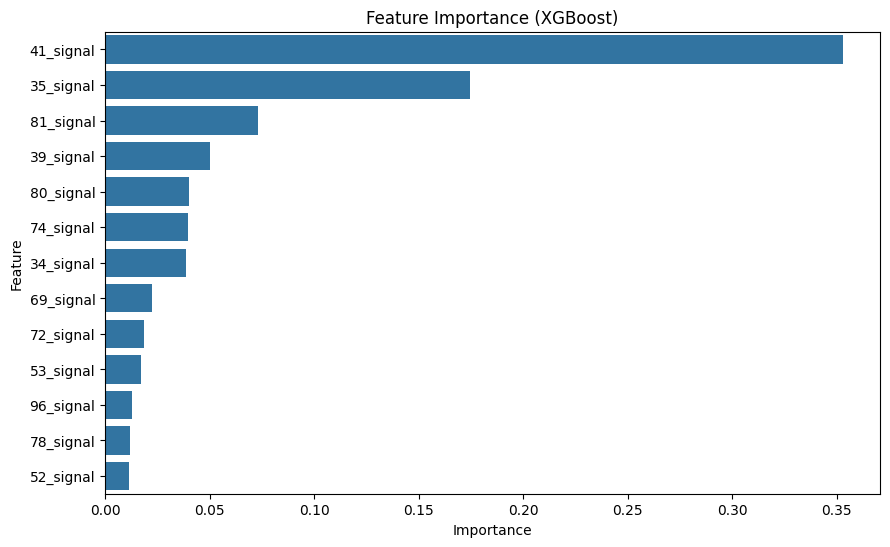

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_copy[:13])
plt.title('Feature Importance (XGBoost)')
plt.show()

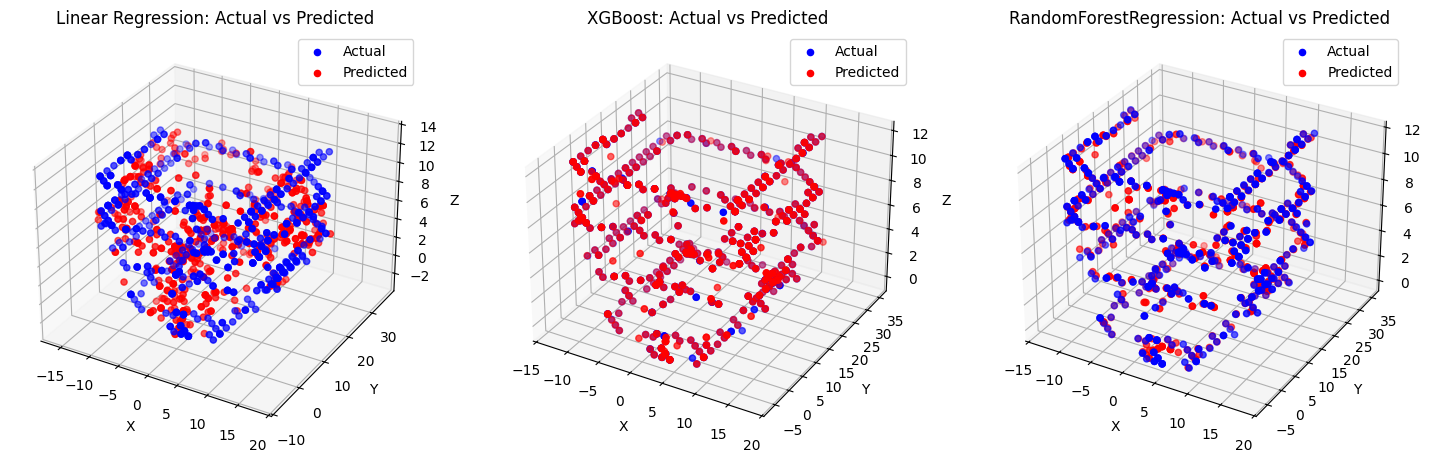

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))


ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(y_test_final['x'], y_test_final['y'], y_test_final['z'], color='b', label='Actual')
ax1.scatter(y_pred_lr_final[:, 0], y_pred_lr_final[:, 1], y_pred_lr_final[:, 2], color='r', label='Predicted')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Linear Regression: Actual vs Predicted')
ax1.legend()

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(y_test_final['x'], y_test_final['y'], y_test_final['z'], color='b', label='Actual')
ax2.scatter(y_pred_xgb_final[:, 0], y_pred_xgb_final[:, 1], y_pred_xgb_final[:, 2], color='r', label='Predicted')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('XGBoost: Actual vs Predicted')
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(y_test_final['x'], y_test_final['y'], y_test_final['z'], color='b', label='Actual')
ax3.scatter(y_pred_rf_final[:, 0], y_pred_rf_final[:, 1], y_pred_rf_final[:, 2], color='r', label='Predicted')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('RandomForestRegression: Actual vs Predicted')
ax3.legend()


plt.show()

# Best Score:
# XGBoost Hyperparameter Optimization Code with Optuna 0.2695 → 0.1679 (16 features)

In [191]:
print(f"Test XGBoost - Mean Euclidean Error: {euclidean_error_xgb_final:.4f}")

Test XGBoost - Mean Euclidean Error: 0.1836


In [60]:
def mean_euclidean_error(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

In [64]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(df_standard[combined_features], df_final[['x','y','z']], test_size=0.3, random_state=13)

In [67]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "random_state": 42
    }

    model = XGBRegressor(**params)
    model.fit(X_train_part, y_train_part)
    preds = model.predict(X_valid)
    return mean_euclidean_error(y_valid, preds)

In [68]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)


[I 2025-04-14 19:48:35,887] A new study created in memory with name: no-name-85f497c6-41b2-4c4e-a333-8b3c1f4f08f2


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-14 19:48:43,789] Trial 0 finished with value: 0.3383309153096944 and parameters: {'n_estimators': 218, 'max_depth': 15, 'learning_rate': 0.1205712628744377, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'reg_alpha': 1.5599452033620265, 'reg_lambda': 0.5808361216819946}. Best is trial 0 with value: 0.3383309153096944.
[I 2025-04-14 19:48:53,644] Trial 1 finished with value: 0.7313671707358055 and parameters: {'n_estimators': 440, 'max_depth': 10, 'learning_rate': 0.11114989443094977, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971, 'reg_alpha': 8.324426408004218, 'reg_lambda': 2.1233911067827616}. Best is trial 0 with value: 0.3383309153096944.
[I 2025-04-14 19:48:55,268] Trial 2 finished with value: 1.9521005852126803 and parameters: {'n_estimators': 132, 'max_depth': 5, 'learning_rate': 0.028145092716060652, 'subsample': 0.762378215816119, 'colsample_bytree': 0.7159725093210578, 'reg_alpha': 2.9122914019804194, 'reg_lambda'

In [69]:
print("Best params:", study.best_params)
print("Best validation Euclidean error:", study.best_value)

Best params: {'n_estimators': 414, 'max_depth': 15, 'learning_rate': 0.15253909432472973, 'subsample': 0.700963115797332, 'colsample_bytree': 0.7157577664677293, 'reg_alpha': 0.01132936531538541, 'reg_lambda': 2.657430050918256}
Best validation Euclidean error: 0.18023438630583902


### I will use 16 features for best model:

In [72]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(df_standard[combined_features[:16]], df_final[['x','y','z']], test_size=0.3, random_state=13)

In [74]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=70, show_progress_bar=True)
print("Best params:", study.best_params)
print('---------------------------------------------------')
print("Best validation Euclidean error:", study.best_value)

[I 2025-04-14 19:59:16,899] A new study created in memory with name: no-name-481ea6e5-062c-46e2-b65f-6d5bfa0f16aa


  0%|          | 0/70 [00:00<?, ?it/s]

[I 2025-04-14 19:59:24,685] Trial 0 finished with value: 0.4591944705333644 and parameters: {'n_estimators': 218, 'max_depth': 15, 'learning_rate': 0.1205712628744377, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'reg_alpha': 1.5599452033620265, 'reg_lambda': 0.5808361216819946}. Best is trial 0 with value: 0.4591944705333644.
[I 2025-04-14 19:59:34,935] Trial 1 finished with value: 0.8639713816950936 and parameters: {'n_estimators': 440, 'max_depth': 10, 'learning_rate': 0.11114989443094977, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971, 'reg_alpha': 8.324426408004218, 'reg_lambda': 2.1233911067827616}. Best is trial 0 with value: 0.4591944705333644.
[I 2025-04-14 19:59:37,103] Trial 2 finished with value: 2.3501397000366366 and parameters: {'n_estimators': 132, 'max_depth': 5, 'learning_rate': 0.028145092716060652, 'subsample': 0.762378215816119, 'colsample_bytree': 0.7159725093210578, 'reg_alpha': 2.9122914019804194, 'reg_lambda'

## 1. Param Importance Plot:

C:\Users\Gökhan ergül\AppData\Local\Temp\ipykernel_3292\2493136665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Parameter', palette='Blues_d')


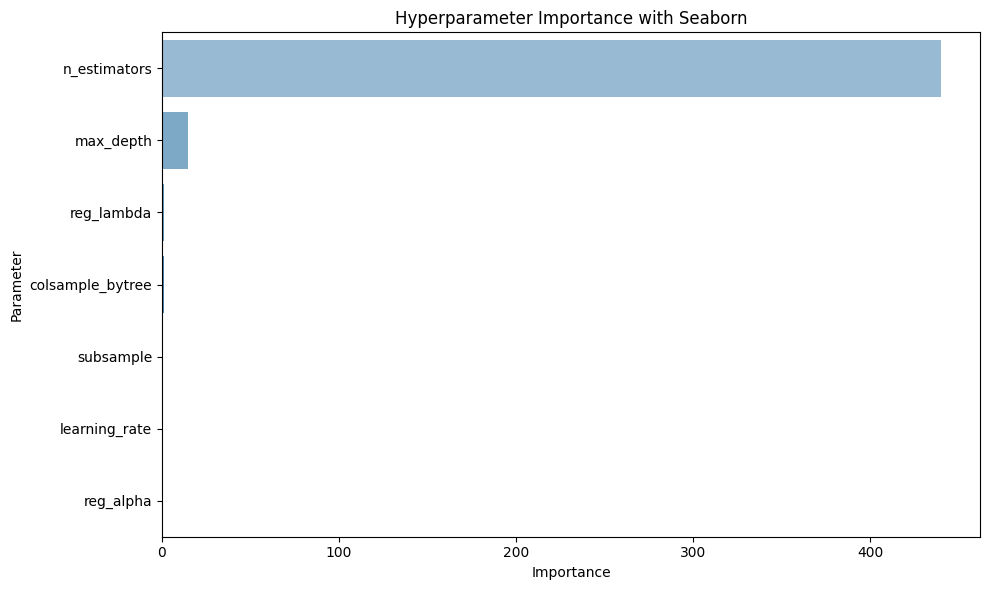

In [91]:
importance_df = pd.DataFrame(sorted(zip(values, params), reverse=True), columns=['Importance', 'Parameter'])

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Parameter', palette='Blues_d')
plt.title('Hyperparameter Importance with Seaborn')
plt.tight_layout()
plt.show()

## 2. Optimization History Plot

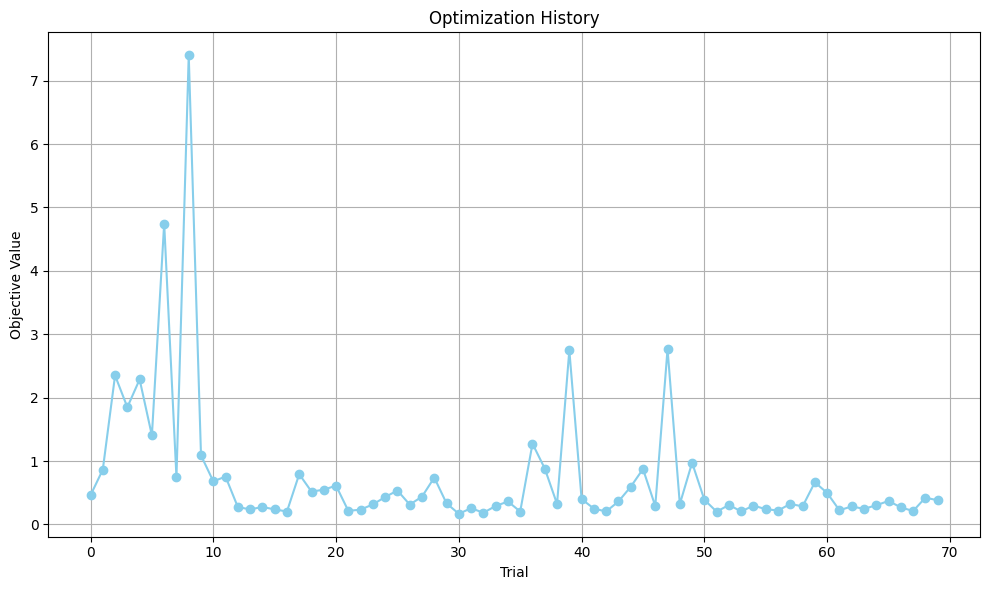

In [94]:
history = [trial.value for trial in study.trials]

plt.figure(figsize=(10, 6))
plt.plot(history, marker='o', color='skyblue', linestyle='-', markersize=6)
plt.xlabel('Trial')
plt.ylabel('Objective Value')
plt.title('Optimization History')
plt.grid(True)
plt.tight_layout()
plt.show()